# Exploring Breach Report Data Exercises

To get you thinking about security, we are asking you to do some exploratory analysis on an interesting dataset about data breaches compiled by the U.S. Department of Health and Human Services. The first couple of exercises will be guided to foster an understanding of the variabes we are working with. After the guided questions, you will explore this data and deliver some of your own insights.

We hope you will realize that real-life security breaches are not always due to dramatic hacking related activity. People often do things (not so smart things) that defy explanations when you look at them after the fact. 

----


### Background:

The U.S. Department of Health and Human services (HHS) oversees the Office of Civil Rights which pursues breaches in confidentiality of Protected Health Information (PHI). Any entity that deals with PHI and is part of a breach of data must report it to the HHS. Breaches affecting 500 or more individuals must be reported no later than 60 days after the breach. For fewer than 500, the entity may report within 60 days or at the end of the year (lumping all small breaches).

The HHS makes the data available (for breaches affecting 500 or more individuals) on their [website](https://ocrportal.hhs.gov/ocr/breach/breach_report.jsf).

On the above site, if you click on "Show Advanced Options" you will see a form for advanced search. Glancing through the form, you should get an idea of what each of the variables (columns) in this dataset represents.

---

### Read in the data

In [30]:
library(dplyr)
library(tidyr)
library(lubridate)
library(ggplot2)

# read in the file
data <- read.csv('../../../datasets/breach_report.csv',na.strings=c("","NA"))

# checkout the data
str(data)

'data.frame':	1847 obs. of  9 variables:
 $ Name.of.Covered.Entity          : Factor w/ 1679 levels " Woodhull Medical and Mental Health Center ",..: 202 921 51 589 851 759 395 920 719 311 ...
 $ State                           : Factor w/ 52 levels "AK","AL","AR",..: 45 25 1 8 5 5 5 5 5 5 ...
 $ Covered.Entity.Type             : Factor w/ 4 levels "Business Associate",..: 4 4 4 2 4 4 4 4 4 4 ...
 $ Individuals.Affected            : int  1000 1000 501 3800 5166 5257 857 6145 952 5900 ...
 $ Breach.Submission.Date          : Factor w/ 1132 levels "01/02/2013","01/02/2014",..: 906 927 935 992 1002 1002 1002 1002 1002 1010 ...
 $ Type.of.Breach                  : Factor w/ 28 levels "Hacking/IT Incident",..: 25 25 25 13 25 25 25 25 25 25 ...
 $ Location.of.Breached.Information: Factor w/ 64 levels "Desktop Computer",..: 64 55 62 49 1 1 1 1 1 49 ...
 $ Business.Associate.Present      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ Web.Description                 : Factor w/ 810

## A Couple of Things to Consider...

In the first couple of exercises we will ask you to analyze the data by date so we are going to go ahead and use `lurbidate`'s `mdy()` function to transform the `Breach.Submission.Date` column.

In [2]:
df <- data %>%
    mutate(Breach.Submission.Date = mdy(Breach.Submission.Date))

You are first going to look at types of breaches, but glancing at the `Type.of.Breach` column reveals that some breaches fall under multiple categories (ex. *Hacking/IT Incident, Other, Unauthorized Access/Disclosure*). These are represented with a list of breach types in the `Type.of.Breach` column. Remember, tidy data has one value per cell, so we need to split these values by commas and then unnest them into their own row, all the while keeping in mind these split values are all **one** incident.



In [3]:
df %>% 
group_by(Type.of.Breach) %>%
summarize(Total = n())

Type.of.Breach,Total
Hacking/IT Incident,268
"Hacking/IT Incident, Other",2
"Hacking/IT Incident, Other, Unauthorized Access/Disclosure",1
"Hacking/IT Incident, Theft",1
"Hacking/IT Incident, Theft, Unauthorized Access/Disclosure",2
"Hacking/IT Incident, Unauthorized Access/Disclosure",8
Improper Disposal,56
"Improper Disposal, Loss",3
"Improper Disposal, Loss, Theft",3
"Improper Disposal, Theft",1


Since we haven't gone over splitting up values within a cell and inserting them into their own rows, we're going to demonstrate how to do so using `dplyr`, `tidyr` and `strsplit()` function.

In [4]:
# Create a function to trim the leading whitespace caused by strsplit
trim.leading <- function (x)  sub("^\\s+", "", x)

In [5]:
df %>% 
    mutate(Type = strsplit(as.character(Type.of.Breach), ",")) %>% # split the values by comma
    unnest(Type) %>% # but these split values into their own row 
    mutate(Type = trim.leading(Type)) %>% # remove any whitespace from individual categories
    group_by(Type) %>%
    summarize(Total = n())

Type,Total
Hacking/IT Incident,282
Improper Disposal,65
Loss,158
Other,97
Theft,803
Unauthorized Access/Disclosure,498
Unknown,13
NA,25


Compare the last two outputs. Notice that the breach types with multiple categories have all been split up and are sorted into their respective individual categories. If you so desire, you can add the `n()` values to make sure this worked.

**Exercise 1**: What percentage of breaches from 2013 onwards involve "Hacking/IT Incident" for each year?

*Things to keep in mind*: 
- You will want to count the number of breaches per year prior to splitting up the types into multiple rows so that you are not duplicating the breach count. For example, an incident marked as *Hacking/IT Incident, Other, Unauthorized Access/Disclosure* is still one incident despite being spread across three rows once split.

In [6]:
# code for exercise 1 goes here
# -----------------------------
data %>%
mutate(Breach.Submission.Date = mdy(Breach.Submission.Date)) %>%
mutate(Year = year(Breach.Submission.Date)) %>%
filter(Year > 2012) %>%
group_by(Year) %>%
mutate(Total = n()) %>%
group_by(Year, Total) %>%
summarise(Hack_Percent = paste0(round(sum(Type.of.Breach == 'Hacking/IT Incident', na.rm = TRUE) / sum(n()) * 100), "%"))

Year,Total,Hack_Percent
2013,274,8%
2014,308,10%
2015,270,21%
2016,329,34%
2017,45,29%


**Exercise 2**: Identify the number of breaches by "Breach Location" for each year.

In [7]:
# code for exercise 2 goes here
df2 <-
data %>%
mutate(Breach.Submission.Date = mdy(Breach.Submission.Date)) %>%
mutate(Year = year(Breach.Submission.Date)) %>%
mutate(Location = strsplit(as.character(Location.of.Breached.Information), ",")) %>%
unnest(Location) %>%
mutate(Location = trim.leading(Location)) %>%
group_by(Year, Location) %>%
summarise(Total = n())
df2

Year,Location,Total
2009,Desktop Computer,7
2009,Electronic Medical Record,1
2009,Email,1
2009,Laptop,5
2009,Network Server,2
2009,Other,2
2009,Other Portable Electronic Device,2
2009,Paper/Films,2
2010,Desktop Computer,29
2010,Electronic Medical Record,3


**Exercise 3**: Create a barchart for each year and stack the different Locations for each year. See `gglot2`'s "stacked barchart" [documentation](http://docs.ggplot2.org/0.9.3.1/geom_bar.html).

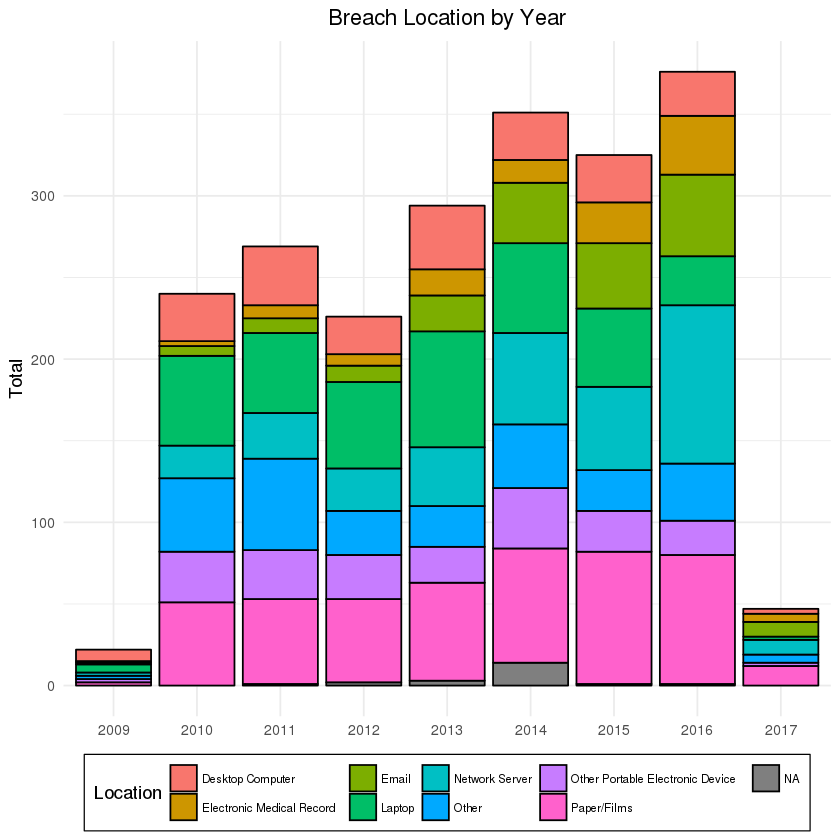

In [8]:
# code for exercise 3 goes here
# -----------------------------
ggplot(df2, aes(x = factor(Year), y = Total)) +
geom_bar(aes(fill = Location), stat = 'identity', color = 'black') +
theme_minimal() +
ggtitle("Breach Location by Year") +
theme(axis.title.x=element_blank()) +
theme(legend.position = "bottom") +
theme(legend.box.background = element_rect()) +
theme(legend.text = element_text(size = 7)) +
theme(plot.title = element_text(hjust = 0.5))

**Exercise 4**: Explore the dataset and produce two more insights. For both, describe the insight. For one of your findings, provide a visualization.

-Things you could try (these are mere suggestions):

- Compare the incidence of "Type of Breach" for all six types per year (starting with 2013)
- Tabulate total number of records lost by year and by whether there was a "Business Associate Involved"
- Perform some type of text analysis for the "Web.Description". This column is a report by HHS after it opened an inquiry into a particular breach. It gives us some information about what happened. Read through a few and you will have an idea of what's in there. For text analysis, you could try making a "Word Cloud".

I thought I would start with an overview of how many individuals are affected by year. 2015 seems to be the year with the most people being affected.

In [12]:
year_count <-data %>%
mutate(Breach.Submission.Date = mdy(Breach.Submission.Date)) %>%
mutate(Year = year(Breach.Submission.Date)) %>%
group_by(Year) %>%
summarise(Count = sum(Individuals.Affected, na.rm = TRUE))
year_count

Year,Count
2009,134773
2010,5534276
2011,13150298
2012,2808042
2013,6950118
2014,12737973
2015,113267174
2016,16655952
2017,326834


Any particular State affected more than any other? Looks like CA, but CA is a big state. It would be worth comparing number of hospitals/healthcare organizations in general. Does CA have a higher percentage of hospitals than other states? So would it make sense that CA has more breaches?

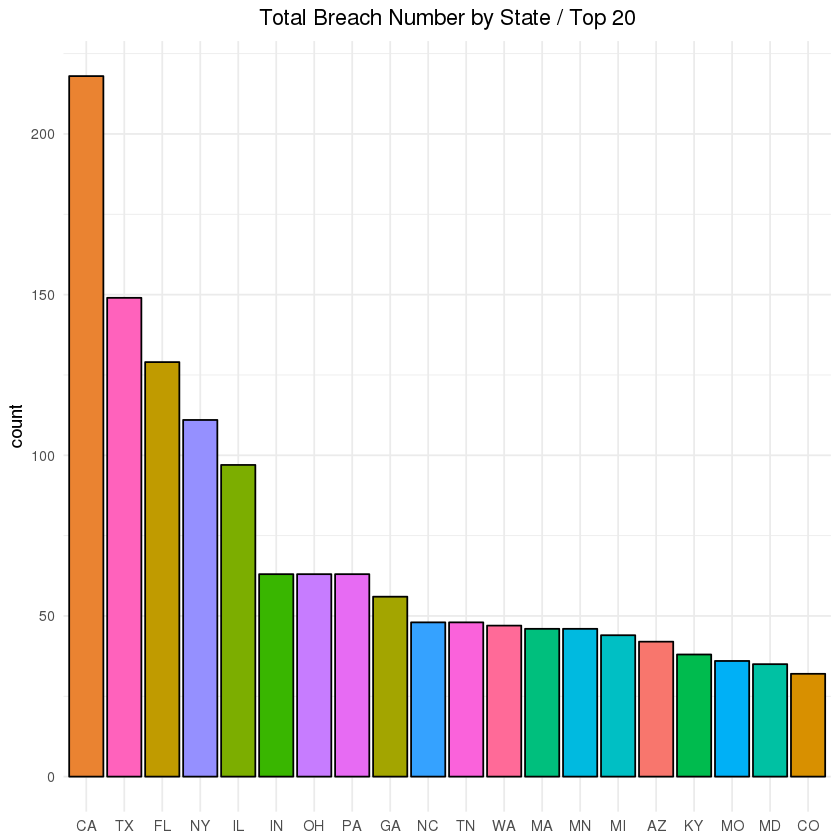

In [13]:
most_state <- df %>%
group_by(State) %>%
summarise(count = n()) %>%
arrange(desc(count))

ggplot(head(most_state, 20), aes(reorder(State, -count), count, fill=State)) +
geom_bar(stat = 'identity', color = 'black') +
theme_minimal() +
ggtitle("Total Breach Number by State / Top 20") +
theme(legend.position="none") +
theme(axis.title.x=element_blank()) +
theme(plot.title = element_text(hjust = 0.5))

I was curious to see how often a business associate was present during these breaches. Turns out, not that often. It does seem that the percentage of a business associate being present is higher with things like Improper Disposal, Loss, Unauthorized Access/Disclosure. When thinking about how often Social Engineering or simply user error is involved with security breaches in general, these numbers seem to make sense. I am curious to understand exactly what the nature of Other would be. Does this group involve similar types of business associate activity?

In [10]:
df %>% 
mutate(Type = strsplit(as.character(Type.of.Breach), ",")) %>%
unnest(Type) %>%
mutate(Type = trim.leading(Type)) %>%
group_by(Type) %>%
summarise(Associate_Present_Percent = paste0(round(sum(Business.Associate.Present == 'Yes', na.rm = TRUE) / sum(n()) * 100), "%"))

Type,Associate_Present_Percent
Hacking/IT Incident,14%
Improper Disposal,20%
Loss,19%
Other,31%
Theft,17%
Unauthorized Access/Disclosure,19%
Unknown,15%
NA,4%


And just to check the math, I took a look at the percentages of a business associate not being present. 

In [11]:
df %>% 
mutate(Type = strsplit(as.character(Type.of.Breach), ",")) %>%
unnest(Type) %>% 
mutate(Type = trim.leading(Type)) %>%
group_by(Type) %>%
summarise(Associate_Not_Present_Percent = paste0(round(sum(Business.Associate.Present == 'No', na.rm = TRUE) / sum(n()) * 100), "%"))

Type,Associate_Not_Present_Percent
Hacking/IT Incident,86%
Improper Disposal,80%
Loss,81%
Other,69%
Theft,83%
Unauthorized Access/Disclosure,81%
Unknown,85%
NA,96%


I've been trying to get a word cloud to work for awhile now, so I decided to go with the suggestion from above. Thanks to the data mining class, I was finally able to get it to work!

In [40]:
library("tm")
library("SnowballC")
library("wordcloud")
library("RColorBrewer")

In [15]:
doc <- read.delim("../../../datasets/web_description.txt", stringsAsFactors=FALSE)
str(doc)

'data.frame':	1393 obs. of  1 variable:
 $ Web.Description: chr  "A binder containing the protected health information (PHI) of up to 1,272 individuals was stolen from a staff member's vehicle. "Five desktop computers containing unencrypted electronic protected health information (e-PHI) were stolen from the covered enti "\\N" "A laptop was lost by an employee while in transit on public transportation.  The computer contained the protected health inform ...


In [16]:
doc_corpus = Corpus(VectorSource(doc$Web.Description))
doc_corpus

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 1393

In [17]:
doc_corpus[[1]]

<<PlainTextDocument>>
Metadata:  7
Content:  chars: 569

In [18]:
inspect(doc_corpus[[1]])

<<PlainTextDocument>>
Metadata:  7
Content:  chars: 569

A binder containing the protected health information (PHI) of up to 1,272 individuals was stolen from a staff member's vehicle.  The PHI included names, telephone numbers, detailed treatment notes, and possibly social security numbers.  In response to the breach, the covered entity (CE) sanctioned the workforce member and developed a new policy requiring on-call staff members to submit any information created during their shifts to the main office instead of adding it to the binder.  Following OCR's investigation, the CE notified the local media about the breach.


In [19]:
toSpace <- content_transformer(function (x , pattern ) gsub(pattern, " ", x))
doc_corpus <- tm_map(doc_corpus, toSpace, "/")
doc_corpus <- tm_map(doc_corpus, toSpace, "@")
doc_corpus <- tm_map(doc_corpus, toSpace, "\\|")

In [20]:
doc_corpus <- tm_map(doc_corpus, content_transformer(tolower))
# Remove numbers
doc_corpus <- tm_map(doc_corpus, removeNumbers)
# Remove english common stopwords
doc_corpus <- tm_map(doc_corpus, removeWords, stopwords("english"))
# Remove punctuations
doc_corpus <- tm_map(doc_corpus, removePunctuation)
# Eliminate extra white spaces
doc_corpus <- tm_map(doc_corpus, stripWhitespace)
# Text stemming
doc_corpus <- tm_map(doc_corpus, stemDocument)

In [21]:
dtm <- TermDocumentMatrix(doc_corpus)
m <- as.matrix(dtm)
v <- sort(rowSums(m),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)
head(d, 10)

,word,freq
breach,breach,1943
inform,inform,1507
individu,individu,1470
health,health,1143
ocr,ocr,1092
affect,affect,1001
provid,provid,985
secur,secur,984
phi,phi,965
protect,protect,892


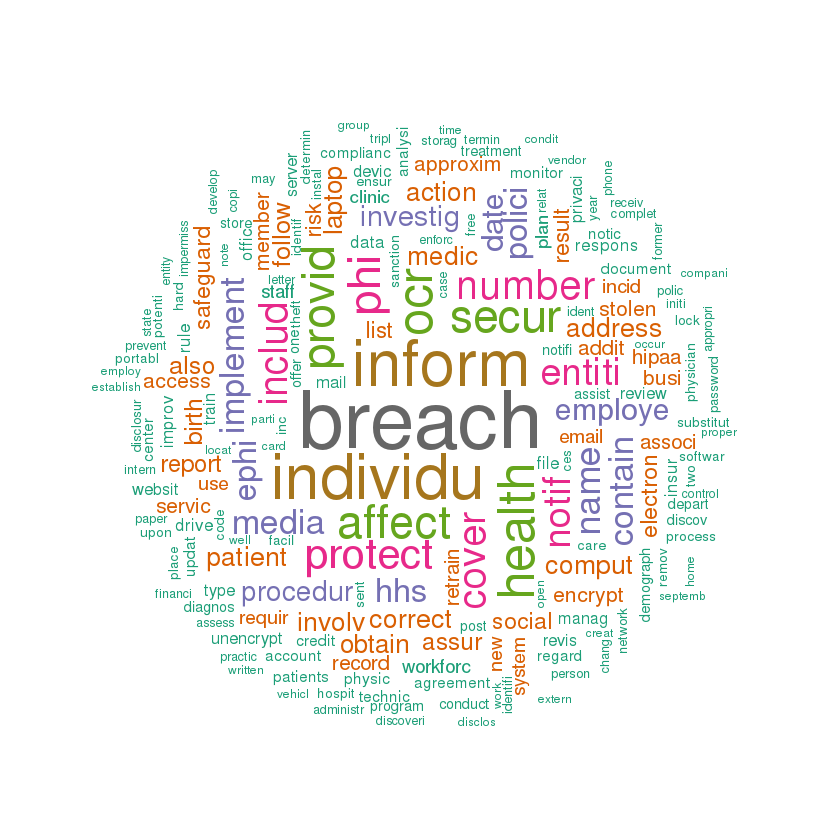

In [22]:
set.seed(1234)
wordcloud(words = d$word, freq = d$freq, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))

In [23]:
findFreqTerms(dtm, lowfreq = 50)

[1] "breach"    "contain"   "cover"     "creat"     "develop"   "entiti"   
  [7] "follow"    "health"    "includ"    "individu"  "inform"    "investig" 
 [13] "local"     "media"     "member"    "name"      "new"       "note"     
 [19] "notifi"    "number"    "ocr"       "offic"     "phi"       "polici"   
 [25] "protect"   "requir"    "respons"   "sanction"  "secur"     "social"   
 [31] "staff"     "stolen"    "treatment" "vehicl"    "workforc"  "affect"   
 [37] "comput"    "demograph" "desktop"   "electron"  "encrypt"   "ephi"     
 [43] "financi"   "hhs"       "improv"    "instal"    "involv"    "monitor"  
 [49] "notif"     "password"  "person"    "physic"    "provid"    "report"   
 [55] "result"    "safeguard" "softwar"   "system"    "technic"   "unencrypt"
 [61] "updat"     "access"    "addit"     "assess"    "birth"     "control"  
 [67] "date"      "employe"   "enforc"    "incid"     "laptop"    "physician"
 [73] "privaci"   "procedur"  "receiv"    "review"    "risk"      "rule"     
 [79] "took"      "train"     "address"   "administr" "appropri"  "backup"   
 [85] "clinic"    "devic"     "drive"     "file"      "hard"      "lock"     
 [91] "patient"   "phone"     "place"     "portabl"   "retrain"   "store"    
 [97] "taken"     "use"       "well"      "open"      "approxim"  "action"   
[103] "assur"     "bill"      "code"      "complet"   "contact"   "correct"  
[109] "employee"  "hospit"    "implement" "insur"     "list"      "medic"    
[115] "obtain"    "plan"      "record"    "revis"     "case"      "center"   
[121] "measur"    "occur"     "regard"    "storag"    "theft"     "also"     
[127] "conduct"   "credit"    "data"      "ensur"     "free"      "ident"    
[133] "identifi"  "intern"    "letter"    "locat"     "may"       "offer"    
[139] "prevent"   "prior"     "sent"      "state"     "year"      "account"  
[145] "agreement" "associ"    "busi"      "ces"       "chang"     "copi"     
[151] "hipaa"     "issu"      "program"   "remov"     "server"    "vendor"   
[157] "facil"     "manag"     "servic"    "type"      "extern"    "home"     
[163] "network"   "practic"   "complianc" "diagnos"   "disclosur" "discoveri"
[169] "mail"      "process"   "proper"    "septemb"   "upon"      "card"     
[175] "depart"    "one"       "termin"    "two"       "due"       "futur"    
[181] "polic"     "establish" "mobil"     "audit"     "care"      "disclos"  
[187] "identif"   "impermiss" "written"   "analysi"   "law"       "post"     
[193] "substitut" "websit"    "work"      "condit"    "assist"    "document" 
[199] "group"     "paper"     "print"     "found"     "relat"     "email"    
[205] "patients"  "initi"     "notic"     "time"      "inc"       "potenti"  
[211] "vulner"    "employ"    "former"    "discov"    "entity"    "internet" 
[217] "parti"     "compani"   "unauthor"  "determin"  "tripl"

In [24]:
findAssocs(dtm, terms = "breach", corlimit = 0.3)

$breach
    notif  individu       hhs    affect    provid     media     cover    inform 
     0.74      0.73      0.73      0.71      0.66      0.65      0.64      0.61 
  protect      name    includ    entiti    involv    follow       ocr    health 
     0.59      0.58      0.57      0.55      0.55      0.52      0.52      0.51 
      phi    obtain     assur implement    number    polici      date     secur 
     0.49      0.49      0.48      0.47      0.46      0.46      0.46      0.45 
   action      also   correct     birth   contain   address  procedur  investig 
     0.45      0.45      0.44      0.43      0.42      0.42      0.41      0.40 
   social  approxim      list  electron safeguard   employe   patient    result 
     0.40      0.38      0.37      0.36      0.35      0.35      0.35      0.34 
     type    report     addit     medic   retrain   respons 
     0.34      0.33      0.33      0.33      0.32      0.30

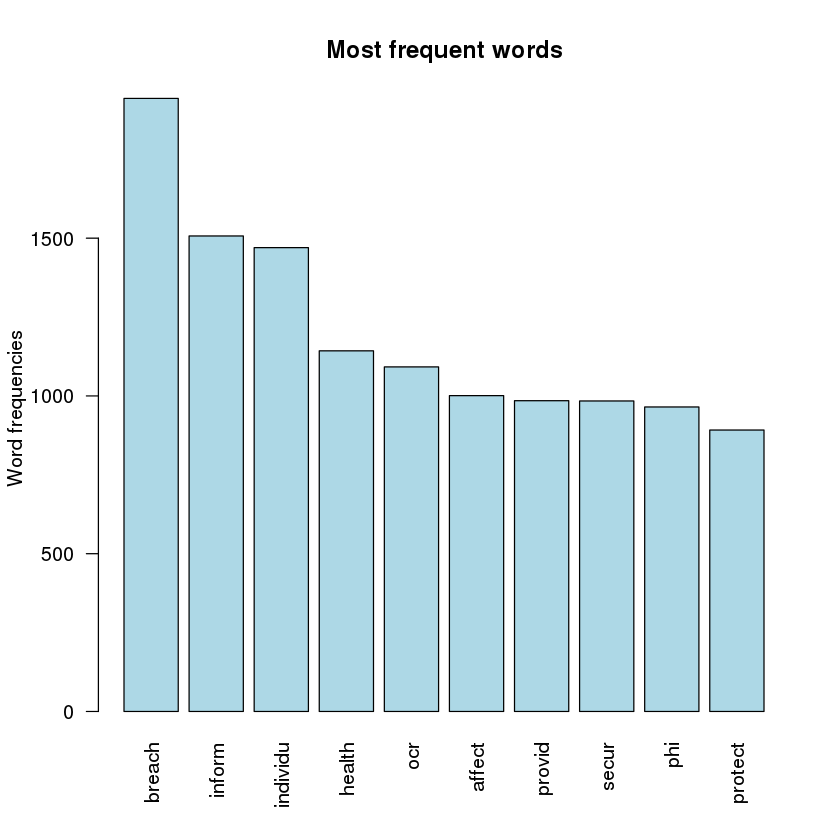

In [25]:
barplot(d[1:10,]$freq, las = 2, names.arg = d[1:10,]$word,
        col ="lightblue", main ="Most frequent words",
        ylab = "Word frequencies")

**Further Learning/Practice (OPTIONAL)**: As mentioned earlier, the Type.of.Breach column reveals that some breaches fall under multiple categories (ex. Hacking/IT Incident, Other, Unauthorized Access/Disclosure) and that tidy data has one value per cell. The above issue arises quite often in practice. The folks who collected data probably had a "Check all that apply" type of question and then lumped all chosen categories into one variable. 

We tackled this problem by splitting the values in the Type.of.Breach column into multiple ROWS where each Breach Record (earlier one row) now has as many rows as there were categories in the Type.of.Breach column for that record. 

Another way to tackle this problem is by creating multiple COLUMNS for each record. For example, we can create "dummy" variables such as "Hacking/IT Incident" or "Theft" etc. Each category now has a column. In the cells, we code a "1" if that category was involved for that record and a "0" if it was not involved. This approach keeps the original number or records intact and allows analyses where we can consider only certain variables in an overall model. See if you can create these columns and retain the same information as in the original dataset. 

In [41]:
library(psych)

In [27]:
new_Type <- dummy.code(df$Type.of.Breach)

In [28]:
new.df <- data.frame(new_Type,df)

In [29]:
str(new.df)

'data.frame':	1847 obs. of  37 variables:
 $ Hacking.IT.Incident                                       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Hacking.IT.Incident..Other                                : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Hacking.IT.Incident..Other..Unauthorized.Access.Disclosure: num  0 0 0 0 0 0 0 0 0 0 ...
 $ Hacking.IT.Incident..Theft                                : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Hacking.IT.Incident..Theft..Unauthorized.Access.Disclosure: num  0 0 0 0 0 0 0 0 0 0 ...
 $ Hacking.IT.Incident..Unauthorized.Access.Disclosure       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Improper.Disposal                                         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Improper.Disposal..Loss                                   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Improper.Disposal..Loss..Theft                            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Improper.Disposal..Theft                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Improper.Disposal..Theft..Unauthori